# Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
2. counts
3. relationship between species
4. conservation status of species
5. observations of species in parks. 

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from scipy import stats

# Inspect and Explore the Observations Data

## Read and Show

In [2]:
observations = pd.read_csv('observations.csv')

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)
observations.head(20)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [3]:
# Explore
# Scientific name
print('The total of animal in observation is {} and unique animal count is {}\n'.format(observations.scientific_name.count(),observations.scientific_name.nunique()))

# Park name
print('The total of Park is {}, that is: {}\n'.format(observations.park_name.nunique(),observations.park_name.unique()))

# Observations
print('The total of observation is {} of all park\n'.format(observations.observations.sum()))
print('========================================================\n')

# Count of animal in each park
for x in observations.park_name.unique():
    temp = observations.scientific_name[observations.park_name == x]
    print('There are {} animals in {}\n'.format(temp.count(),x))
print('========================================================\n')

# Num of observation that happend in each park
for x in observations.park_name.unique():
    temp = observations.observations[observations.park_name == x]
    print('There are {} observations in {}\n'.format(temp.sum(),x))

The total of animal in observation is 23296 and unique animal count is 5541

The total of Park is 4, that is: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']

The total of observation is 3314739 of all park


There are 5824 animals in Great Smoky Mountains National Park

There are 5824 animals in Yosemite National Park

There are 5824 animals in Bryce National Park

There are 5824 animals in Yellowstone National Park


There are 431820 observations in Great Smoky Mountains National Park

There are 863332 observations in Yosemite National Park

There are 576025 observations in Bryce National Park

There are 1443562 observations in Yellowstone National Park



## Visualize the Data

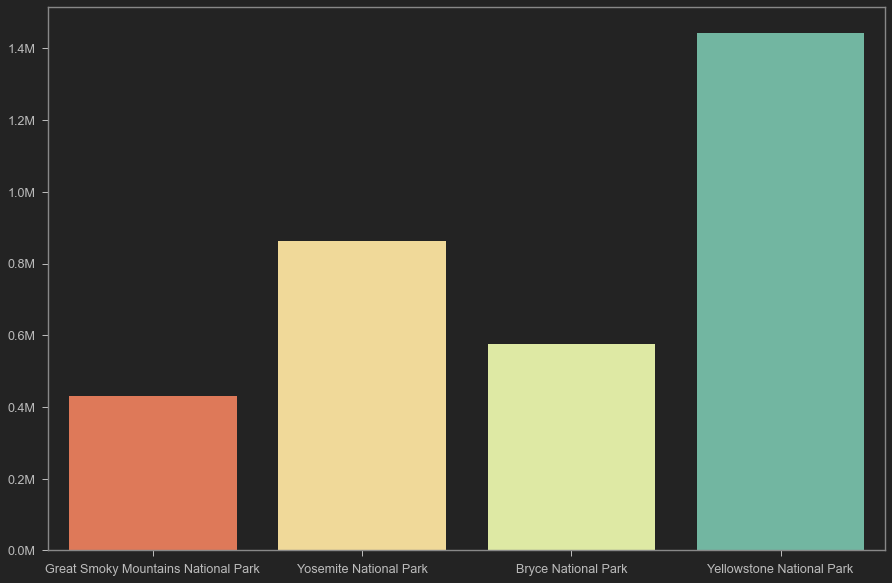

In [4]:
# Observation total count by park name
value = []
for x in observations.park_name.unique():
    temp = observations.observations[observations.park_name == x]
    value.append(temp.sum())
park = observations.park_name.unique()

plt.figure(figsize=(15,10))
ax = sns.barplot(x=park,y=value,palette='Spectral')
ax.yaxis.set_major_formatter(formatter)
plt.show()

# Inspect and Explore the Species Data

## Read and Show

In [5]:
species = pd.read_csv('species_info.csv')
species.head(20)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [6]:
# Explore
# Category observed
print('There are {} category, that is {}\n'.format(species.category.nunique(),species.category.unique()))

# Count of animal category
for x in species.category.unique():
    temp = species.category[species.category == x]
    tempp = temp.count()
    print('There are {} animals of {}'.format(x,tempp))

# Animal count
print('\nThere are {} animals in total\n'.format(species.common_names.count()))

# Rename Nan in conservation
species.conservation_status = species.conservation_status.fillna('No Intervention')

# Conservation status
print(species.groupby("conservation_status").size())

# New column to find species is protected or no
species['is_protected'] = species.conservation_status != 'No Intervention'
species['not_protected'] = species.is_protected == False

species.head(20)

There are 7 category, that is ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

There are Mammal animals of 214
There are Bird animals of 521
There are Reptile animals of 79
There are Amphibian animals of 80
There are Fish animals of 127
There are Vascular Plant animals of 4470
There are Nonvascular Plant animals of 333

There are 5824 animals in total

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64


,category,scientific_name,common_names,conservation_status,is_protected,not_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,True
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,True
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,True
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,True
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,True
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,True
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


## Visualize the Data

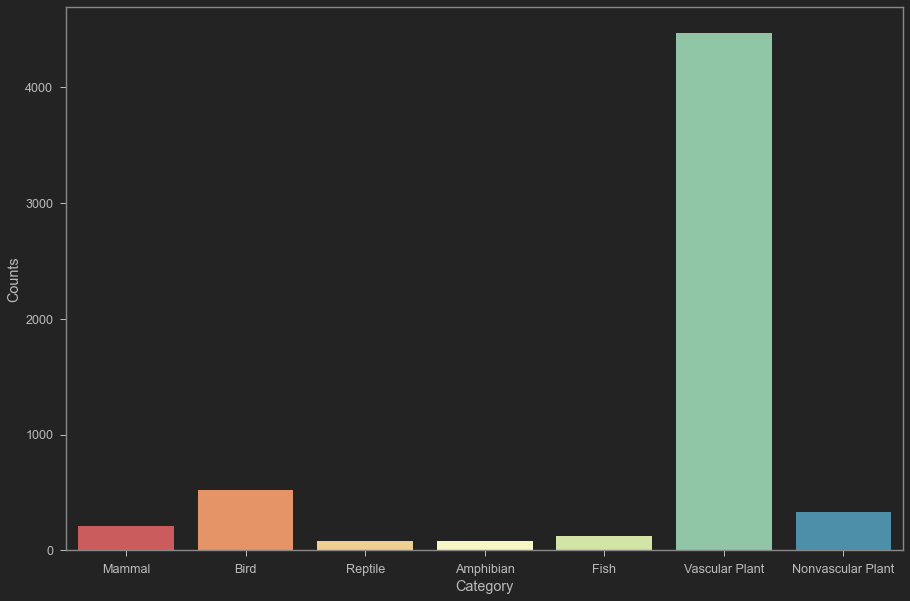

In [7]:
# Category count
value = []
cat = species.category.unique()
for x in species.category.unique():
    temp = species.category[species.category == x]
    tempp = temp.count()
    value.append(tempp)

plt.figure(figsize=(15,10))
sns.barplot(x=cat,y=value,palette='Spectral')
plt.ylabel('Counts')
plt.xlabel('Category')
plt.show()

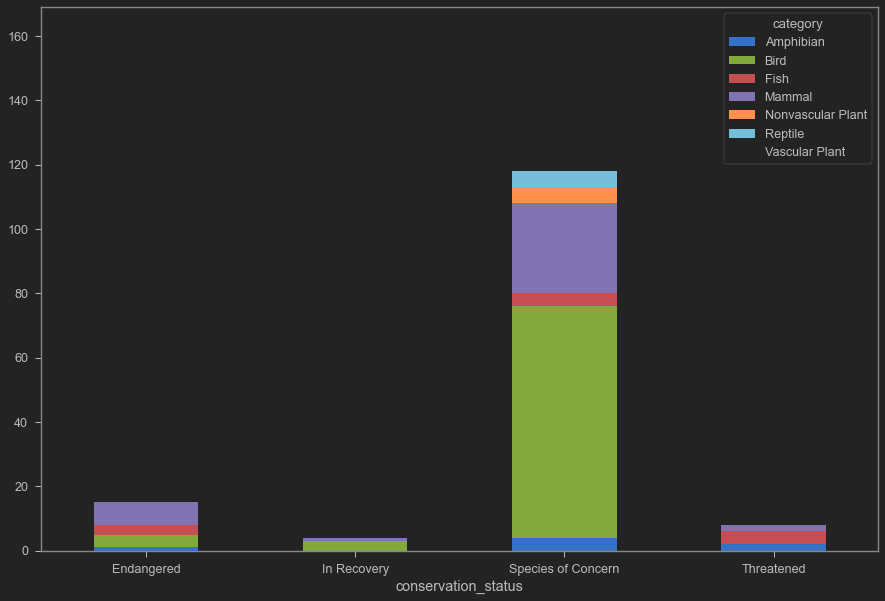

In [8]:
# Category count
catdata = species[species.conservation_status != "No Intervention"].groupby(["conservation_status", "category"])['scientific_name'].count().unstack()

catdata.plot(kind = 'bar',stacked=True,figsize=(15,10))
plt.xticks(rotation=0)
plt.show()

In [9]:
# Difference between protected and not
cat_status = species.groupby(['category', 'is_protected']).scientific_name.nunique()\
                                                            .reset_index()\
                                                            .pivot(columns='is_protected',
                                                                        index='category',
                                                                        values='scientific_name')\
                                                            .reset_index()

cat_status.columns = ['category', 'not_protected', 'protected']
cat_status['proteced_percentage'] = (cat_status.protected / (cat_status.protected + cat_status.not_protected)) * 100
cat_status['percentage'] = ((cat_status.protected + cat_status.not_protected) / species.scientific_name.nunique()) * 100 
cat_status['total_animal'] = cat_status.protected+ cat_status.not_protected
cat_status

,category,not_protected,protected,proteced_percentage,percentage,total_animal
0,Amphibian,72,7,8.860759,1.425735,79
1,Bird,413,75,15.368852,8.807075,488
2,Fish,115,11,8.730159,2.273958,126
3,Mammal,146,30,17.045455,3.176322,176
4,Nonvascular Plant,328,5,1.501502,6.009746,333
5,Reptile,73,5,6.410256,1.407688,78
6,Vascular Plant,4216,46,1.079305,76.917524,4262


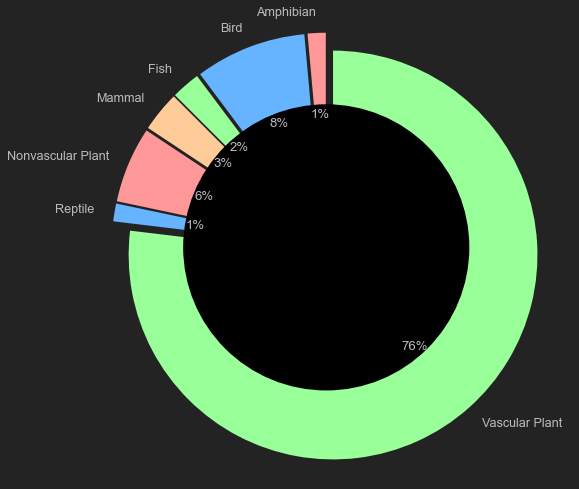

In [10]:
# Pie chart of category
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
plt.pie(cat_status.percentage,labels=cat_status.category, autopct='%1d%%',colors=colors, startangle=90,explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

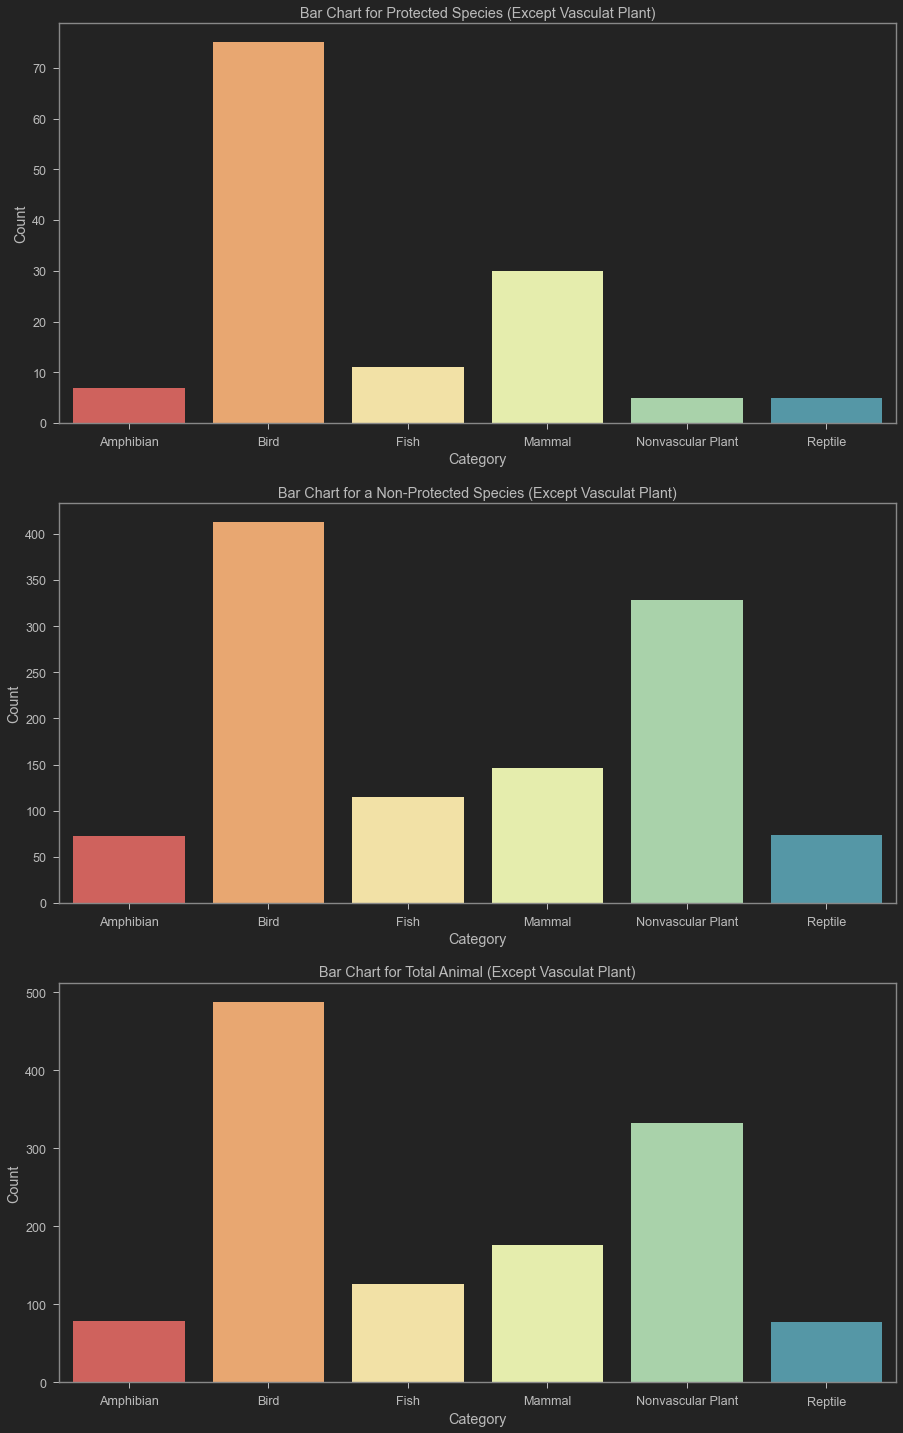

In [11]:
# Bar chart for category except Vascular Plant
temp_data = cat_status[cat_status.category != 'Vascular Plant']
plt.figure(figsize=(15,25))
plt.subplot(311)
sns.barplot(data=temp_data,x='category' ,y='protected', palette='Spectral')
plt.title('Bar Chart for Protected Species (Except Vasculat Plant)')
plt.xlabel('Category')
plt.ylabel('Count')

plt.subplot(312)
sns.barplot(data=temp_data,x='category' ,y='not_protected', palette='Spectral')
plt.title('Bar Chart for a Non-Protected Species (Except Vasculat Plant)')
plt.xlabel('Category')
plt.ylabel('Count')

plt.subplot(313)
sns.barplot(data=temp_data,x='category' ,y='total_animal',palette='Spectral')
plt.title('Bar Chart for Total Animal (Except Vasculat Plant)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

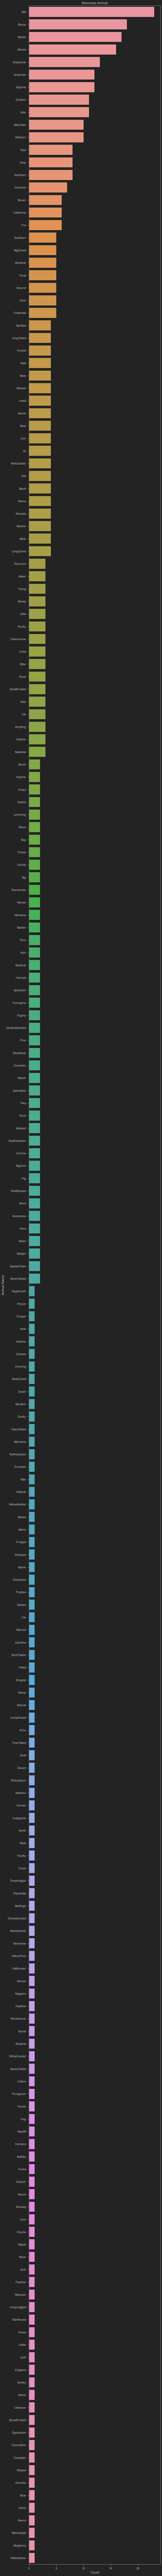

In [12]:
# Search species in park for mammals
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"].common_names.apply(remove_punctuations).str.split().tolist()

# Clean from duplicates
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)

# Create it into 1 list
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))

words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

    
mammals = pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False)
plt.figure(figsize=(10,200))
sns.barplot(y=mammals.Word,x=mammals.Count)
plt.title('Mammals Animal')
plt.ylabel('Animal Name')
plt.show()


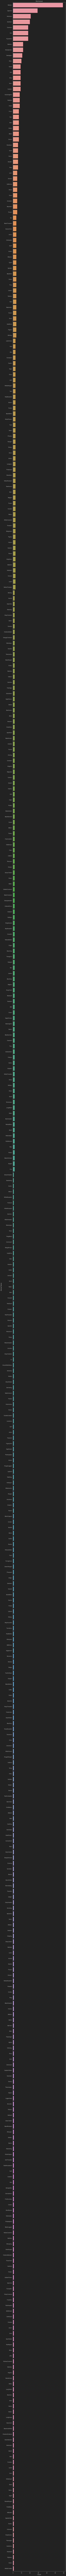

In [13]:
# Search species in park for Bird
common_Names = species[species.category == "Bird"].common_names.apply(remove_punctuations).str.split().tolist()

# Clean from duplicates
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)

# Create it into 1 list
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))

words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

    
Bird = pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False)
plt.figure(figsize=(10,500))
sns.barplot(y=Bird.Word,x=Bird.Count)
plt.title('Bird Animal')
plt.ylabel('Animal Name')
plt.show()

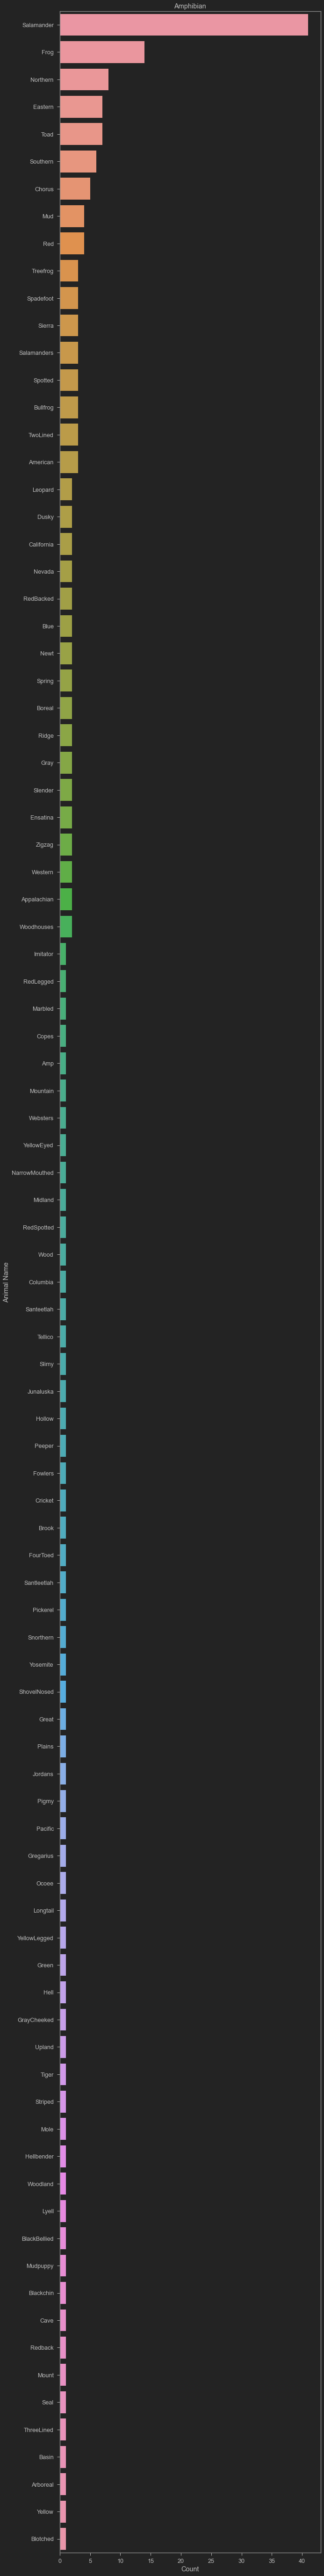

In [14]:
# Search species in park for Amphibian
common_Names = species[species.category == "Amphibian"].common_names.apply(remove_punctuations).str.split().tolist()

# Clean from duplicates
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)

# Create it into 1 list
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))

words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))
    
Amphibian = pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False)
plt.figure(figsize=(10,100))
sns.barplot(y=Amphibian.Word,x=Amphibian.Count)
plt.title('Amphibian')
plt.ylabel('Animal Name')
plt.show()

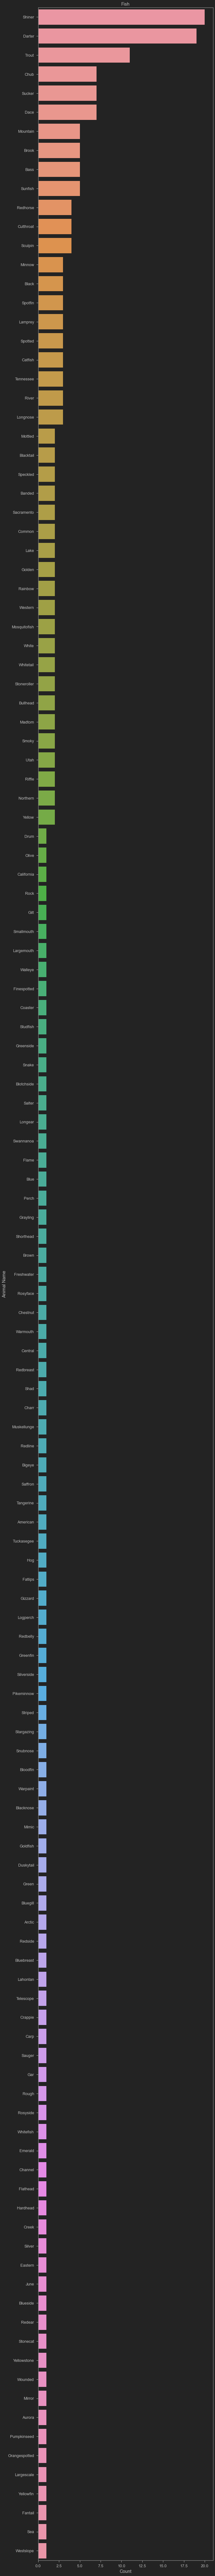

In [15]:
# Search species in park for Fish
common_Names = species[species.category == "Fish"].common_names.apply(remove_punctuations).str.split().tolist()

# Clean from duplicates
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)

# Create it into 1 list
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))

words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))
    
Fish = pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False)
plt.figure(figsize=(10,150))
sns.barplot(y=Fish.Word,x=Fish.Count)
plt.title('Fish')
plt.ylabel('Animal Name')
plt.show()

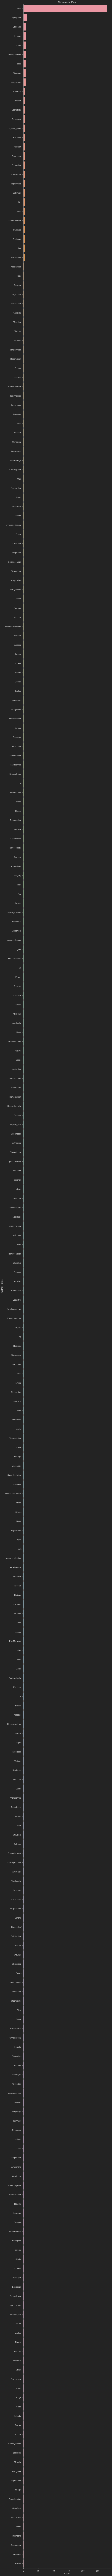

In [16]:
# Search species in park for Fish
common_Names = species[species.category == "Nonvascular Plant"].common_names.apply(remove_punctuations).str.split().tolist()

# Clean from duplicates
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)

# Create it into 1 list
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))

words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))
    
Nonvascular = pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False)
plt.figure(figsize=(10,300))
sns.barplot(y=Nonvascular.Word,x=Nonvascular.Count)
plt.title('Nonvascular Plant')
plt.ylabel('Animal Name')
plt.show()

# Inspect and Explore the Combined Data

In [17]:
# Explore
# Combining the data
final_observ = observations.merge(species)
final_observ.dropna(inplace=True)
final_observ.head(20)

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,not_protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,True
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,True
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,True
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False,True
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention,False,True
5,Neovison vison,Yellowstone National Park,218,Mammal,American Mink,No Intervention,False,True
6,Neovison vison,Bryce National Park,91,Mammal,American Mink,No Intervention,False,True
7,Neovison vison,Yosemite National Park,200,Mammal,American Mink,No Intervention,False,True
8,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention,False,True
9,Prunus subcordata,Yellowstone National Park,217,Vascular Plant,Klamath Plum,No Intervention,False,True


In [18]:
# Show detail of each park by Category
final_observ.groupby(['park_name','category']).count()

scientific_name  \
park_name                           category                             
Bryce National Park                 Amphibian                       82   
                                    Bird                           591   
                                    Fish                           131   
                                    Mammal                         300   
                                    Nonvascular Plant              333   
                                    Reptile                         81   
                                    Vascular Plant                4890   
Great Smoky Mountains National Park Amphibian                       82   
                                    Bird                           591   
                                    Fish                           131   
                                    Mammal                         300   
                                    Nonvascular Plant              333   
                                    Reptile                         81   
                                    Vascular Plant                4890   
Yellowstone National Park           Amphibian                       82   
                                    Bird                           591   
                                    Fish                           131   
                                    Mammal                         300   
                                    Nonvascular Plant              333   
                                    Reptile                         81   
                                    Vascular Plant                4890   
Yosemite National Park              Amphibian                       82   
                                    Bird                           591   
                                    Fish                           131   
                                    Mammal                         300   
                                    Nonvascular Plant              333   
                                    Reptile                         81   
                                    Vascular Plant                4890   

                                                       observations  \
park_name                           category                          
Bryce National Park                 Amphibian                    82   
                                    Bird                        591   
                                    Fish                        131   
                                    Mammal                      300   
                                    Nonvascular Plant           333   
                                    Reptile                      81   
                                    Vascular Plant             4890   
Great Smoky Mountains National Park Amphibian                    82   
                                    Bird                        591   
                                    Fish                        131   
                                    Mammal                      300   
                                    Nonvascular Plant           333   
                                    Reptile                      81   
                                    Vascular Plant             4890   
Yellowstone National Park           Amphibian                    82   
                                    Bird                        591   
                                    Fish                        131   
                                    Mammal                      300   
                                    Nonvascular Plant           333   
                                    Reptile                      81   
                                    Vascular Plant             4890   
Yosemite National Park              Amphibian                    82   
                                    Bird                        591   
                                    Fish                   

In [19]:
# Explore
# Scientific name
print('The total of animal in observation is {} and unique animal count is {}\n'.format(final_observ.scientific_name.count(),final_observ.scientific_name.nunique()))

# Park name
print('The total of Park is {}, that is: {}\n'.format(final_observ.park_name.nunique(),final_observ.park_name.unique()))

# Observations
print('The total of observation is {} of all park\n'.format(final_observ.observations.sum()))
print('========================================================\n')

# Count of animal in each park
for x in final_observ.park_name.unique():
    temp = final_observ.scientific_name[final_observ.park_name == x]
    print('There are {} animals in {}\n'.format(temp.count(),x))
print('========================================================\n')

# Num of observation that happend in each park
for x in final_observ.park_name.unique():
    temp = final_observ.observations[final_observ.park_name == x]
    print('There are {} observations in {}\n'.format(temp.sum(),x))

The total of animal in observation is 25632 and unique animal count is 5541

The total of Park is 4, that is: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Yellowstone National Park' 'Bryce National Park']

The total of observation is 3645247 of all park


There are 6408 animals in Great Smoky Mountains National Park

There are 6408 animals in Yosemite National Park

There are 6408 animals in Yellowstone National Park

There are 6408 animals in Bryce National Park


There are 474863 observations in Great Smoky Mountains National Park

There are 949452 observations in Yosemite National Park

There are 1587641 observations in Yellowstone National Park

There are 633291 observations in Bryce National Park



## Visualize the Data

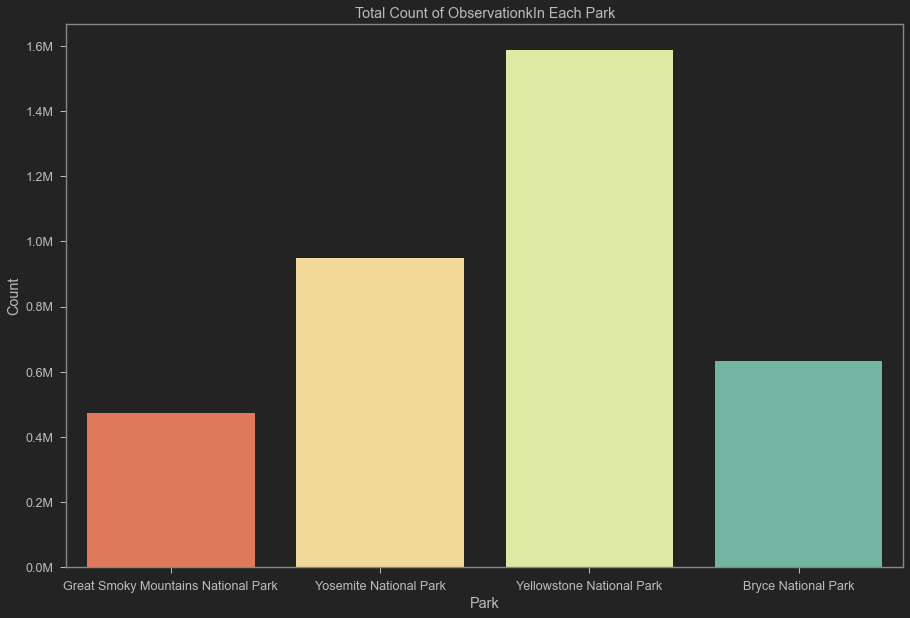

In [20]:
# Num of observation by each park
value = []
for x in final_observ.park_name.unique():
    temp = final_observ.observations[final_observ.park_name == x]
    value.append(temp.sum())
park = final_observ.park_name.unique()

plt.figure(figsize=(15,10))
ax = sns.barplot(x=park,y=value,palette='Spectral')
ax.yaxis.set_major_formatter(formatter)
plt.title('Total Count of ObservationkIn Each Park')
plt.xlabel('Park')
plt.ylabel('Count')
plt.show()

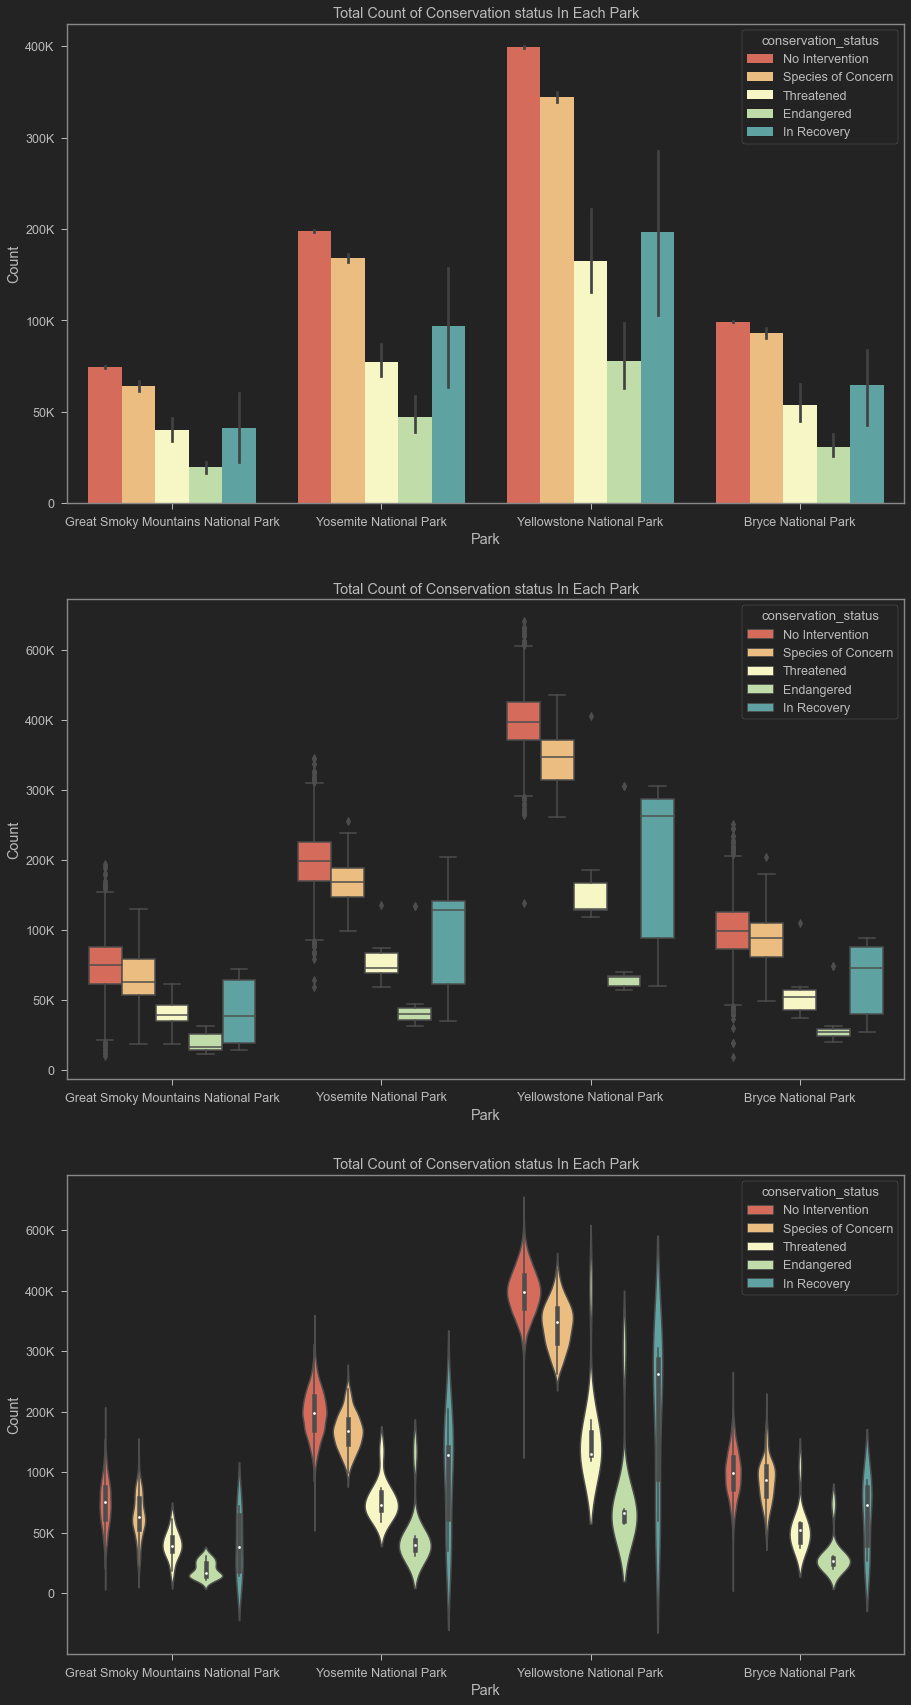

In [21]:
# Chart for Observation by Park name for Conservation status
# Bar plot
plt.figure(figsize=(15,30))
plt.subplot(3,1,1)
sns.barplot(data=final_observ,x='park_name',y='observations',hue='conservation_status',palette='Spectral')
plt.title('Total Count of Conservation status In Each Park')
plt.yticks([0,50,100,150,200,250], ['0', '50K', '100K', '200K', '300K', '400K']) 
plt.xlabel('Park')
plt.ylabel('Count')

# Box plot
plt.subplot(3,1,2)
sns.boxplot(data=final_observ,x='park_name',y='observations',hue='conservation_status',palette='Spectral')
plt.title('Total Count of Conservation status In Each Park')
plt.yticks([0,50,100,150,200,250,300], ['0', '50K', '100K', '200K', '300K', '400K','600K']) 
plt.xlabel('Park')
plt.ylabel('Count')

# Violin plot
plt.subplot(3,1,3)
sns.violinplot(data=final_observ,x='park_name',y='observations',hue='conservation_status',palette='Spectral')
plt.title('Total Count of Conservation status In Each Park')
plt.yticks([0,50,100,150,200,250,300], ['0', '50K', '100K', '200K', '300K', '400K','600K'])
plt.xlabel('Park')
plt.ylabel('Count')
plt.show()

In [22]:
# Clean the data because it seems error
words_temp = []

length = final_observ.common_names.count()
park_list = final_observ.park_name.unique()
count = 0
while count < 4:
    tempat1 = None

    temp1 = 0
    tempp1 = None
    temppp1 = 0
    tempppp1 = 0
    temppppp1 = 0
    temp2 = 0
    tempp2 = None
    temppp2 = 0
    tempppp2 = 0
    temppppp2 = 0
    temp3 = 0
    tempp3 = None
    temppp3 = 0
    tempppp3 = 0
    temppppp3 = 0
    temp4 = 0
    tempp4 = None
    temppp4 = 0
    tempppp4 = 0
    temppppp4 = 0
    temp5 = 0
    tempp5 = None
    temppp5 = 0
    tempppp5 = 0
    temppppp5 = 0
    temp6 = 0
    tempp6 = None
    temppp6 = 0
    tempppp6 = 0
    temppppp6 = 0
    
    for x in range(length):
        if final_observ.park_name[x] == park_list[count]:
            tempat1 = park_list[count]
            if final_observ.category[x] == 'Nonvascular Plant':
                temp1 += 1
                tempp1 = 'Nonvascular Plant'
                temppp1 += final_observ.observations[x]
                if final_observ.is_protected[x] == True:
                    tempppp1 += 1
                else:
                    temppppp1 += 1
            elif final_observ.category[x] == 'Mammal':
                temp2 += 1
                tempp2 = 'Mammal'
                temppp2 += final_observ.observations[x]
                if final_observ.is_protected[x] == True:
                    tempppp2 += 1
                else:
                    temppppp2 += 1
            elif final_observ.category[x] == 'Bird':
                temp3 += 1
                tempp3 = 'Bird'
                temppp3 += final_observ.observations[x]
                if final_observ.is_protected[x] == True:
                    tempppp3 += 1
                else:
                    temppppp3 += 1
            elif final_observ.category[x] == 'Amphibian':
                temp4 += 1
                tempp4 = 'Amphibian'
                temppp4 += final_observ.observations[x]
                if final_observ.is_protected[x] == True:
                    tempppp4 += 1
                else:
                    temppppp4 += 1
            elif final_observ.category[x] == 'Reptile':
                temp5 += 1
                tempp5 = 'Reptile'
                temppp5 += final_observ.observations[x]
                if final_observ.is_protected[x] == True:
                    tempppp5 += 1
                else:
                    temppppp5 += 1
            elif final_observ.category[x] == 'Fish':
                temp6 += 1
                tempp6 = 'Fish'
                temppp6 += final_observ.observations[x]
                if final_observ.is_protected[x] == True:
                    tempppp6 += 1
                else:
                    temppppp6 += 1
            else:
                continue


    words_temp.append((tempat1,temp1,tempp1,temppp1,tempppp1,temppppp1))
    words_temp.append((tempat1,temp2,tempp2,temppp2,tempppp2,temppppp2))
    words_temp.append((tempat1,temp3,tempp3,temppp3,tempppp3,temppppp3))
    words_temp.append((tempat1,temp4,tempp4,temppp4,tempppp4,temppppp4))
    words_temp.append((tempat1,temp5,tempp5,temppp5,tempppp5,temppppp5))
    words_temp.append((tempat1,temp6,tempp6,temppp6,tempppp6,temppppp6))
    
    count += 1
    
observ_final = pd.DataFrame(set(words_temp), columns =['Park', 'Count', 'Category','Observations','Protected','Not Protected'])
observ_final

,Park,Count,Category,Observations,Protected,Not Protected
0,Yosemite National Park,81,Reptile,11779,5,76
1,Yellowstone National Park,333,Nonvascular Plant,83021,5,328
2,Great Smoky Mountains National Park,131,Fish,9482,12,119
3,Bryce National Park,131,Fish,12823,12,119
4,Great Smoky Mountains National Park,81,Reptile,5841,5,76
5,Great Smoky Mountains National Park,82,Amphibian,5876,7,75
6,Yellowstone National Park,131,Fish,31459,12,119
7,Yosemite National Park,131,Fish,19137,12,119
8,Bryce National Park,300,Mammal,28830,58,242
9,Bryce National Park,591,Bird,58590,87,504


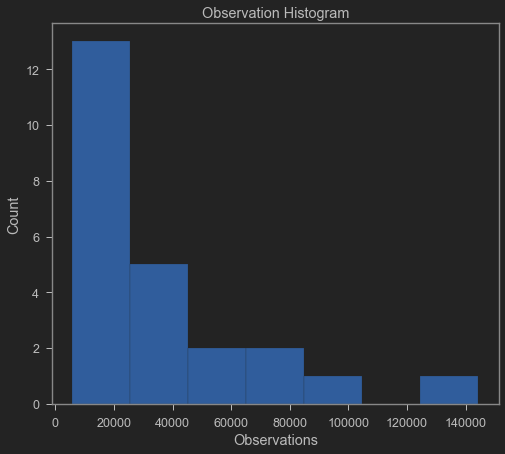

In [23]:
# Histogram of Observations
sns.histplot(data=observ_final,x='Observations',color='b')
plt.title('Observation Histogram')
plt.show()

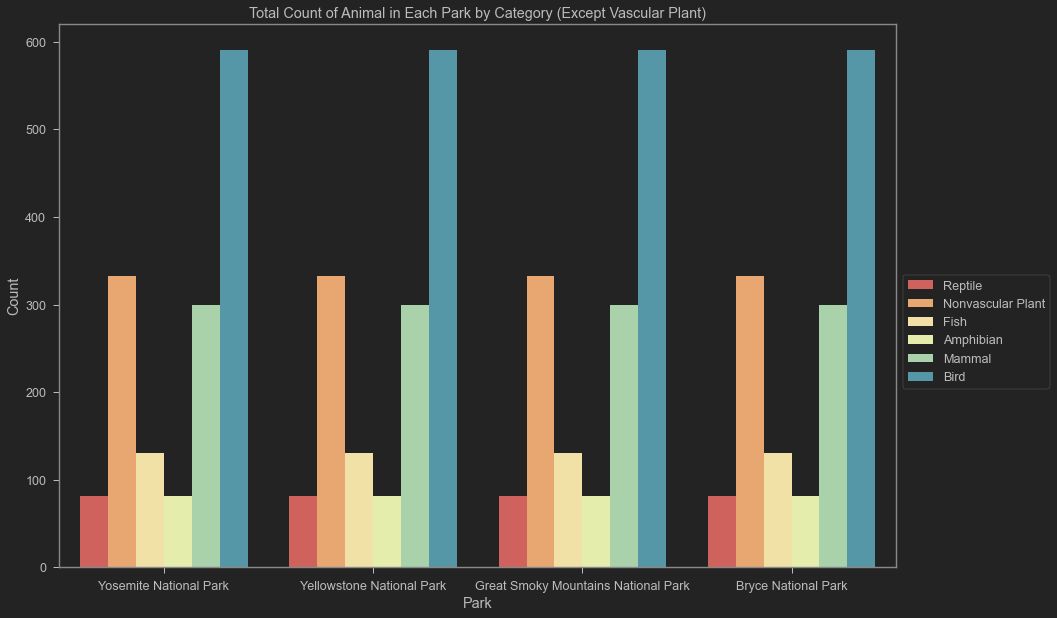

In [24]:
# Chart for Animal Count by Park name for Category
plt.figure(figsize=(15,10))
sns.barplot(data=observ_final,x='Park',y='Count',hue='Category',palette='Spectral')
plt.title('Total Count of Animal in Each Park by Category (Except Vascular Plant)')
plt.legend(bbox_to_anchor=(1, 0.55))
plt.xlabel('Park')
plt.ylabel('Count')
plt.show()

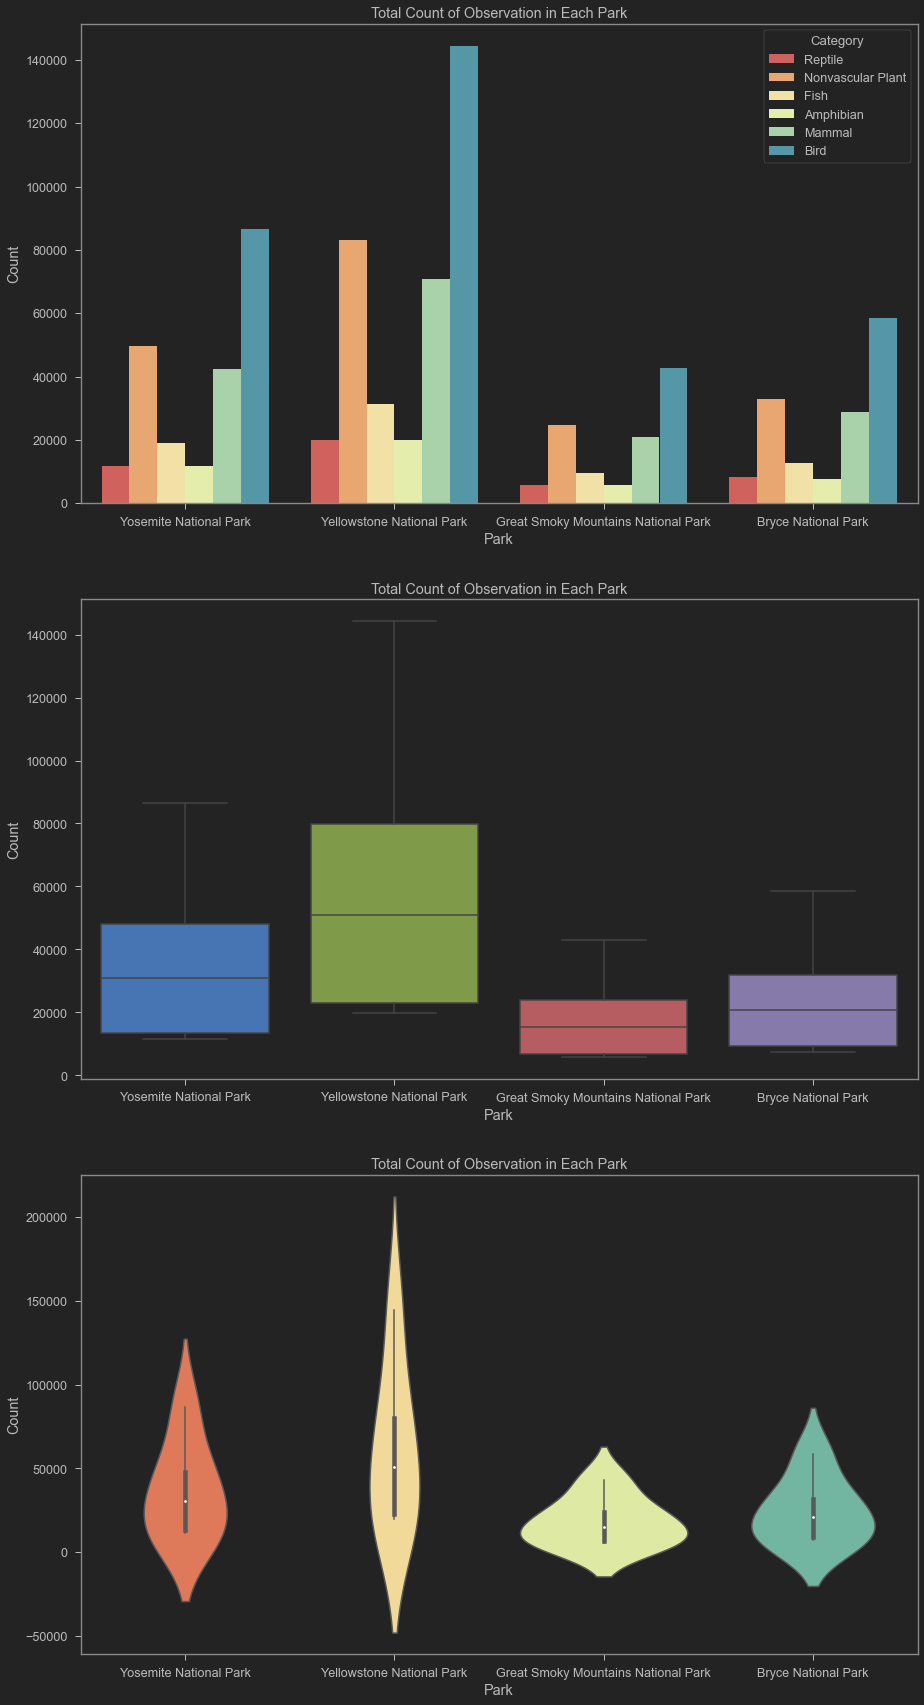

In [25]:
# Chart for Observation by Park name for Category
# Bar plot
plt.figure(figsize=(15,30))
plt.subplot(3,1,1)
sns.barplot(data=observ_final,x='Park',y='Observations',hue='Category',palette='Spectral')
plt.title('Total Count of Observation in Each Park')
plt.xlabel('Park')
plt.ylabel('Count')

# Box plot
plt.subplot(3,1,2)
sns.boxplot(data=observ_final,x='Park',y='Observations')
plt.title('Total Count of Observation in Each Park')
plt.xlabel('Park')
plt.ylabel('Count')

# Violin plot
plt.subplot(3,1,3)
sns.violinplot(data=observ_final,x='Park',y='Observations',palette='Spectral')
plt.title('Total Count of Observation in Each Park')
plt.xlabel('Park')
plt.ylabel('Count')
plt.show()

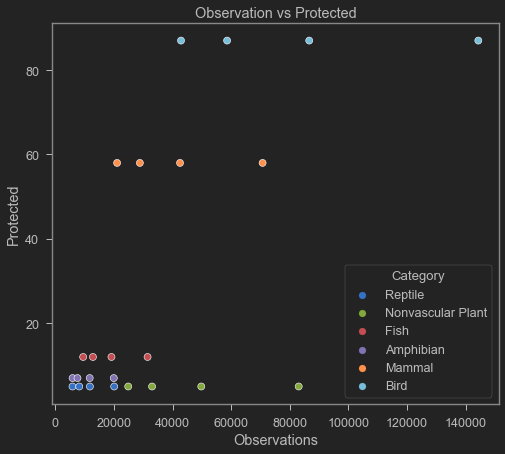

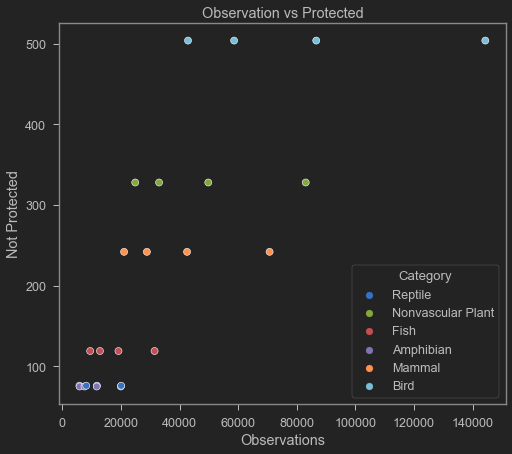

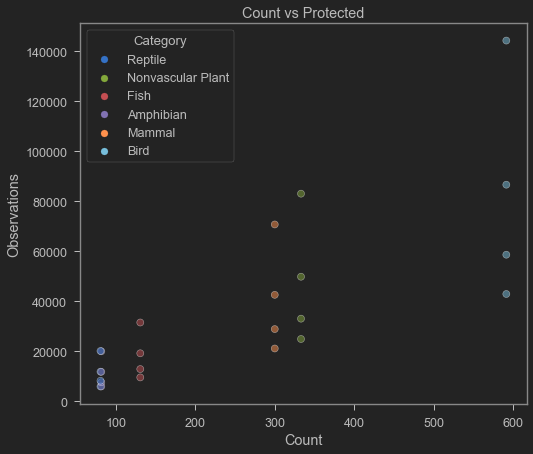

In [26]:
# Scatter for Numerical Data 
# Observation vs Protected
sns.scatterplot(data=observ_final,x='Observations',y='Protected',hue='Category')
plt.title('Observation vs Protected')
plt.show()

# Observation vs Not Protected
sns.scatterplot(data=observ_final,x='Observations',y='Not Protected',hue='Category')
plt.title('Observation vs Protected')
plt.show()

# Observation vs Protected
sns.scatterplot(data=observ_final,x='Count',y='Observations',hue='Category',alpha=0.5)
plt.title('Count vs Protected')
plt.show()

# Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.ervation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.